#### 기획 
각종 질병 및 생활습관에 따른 심장질환 환자 예측 

### 심장질환 환자 예측 
#### 오차행렬

- 양성(Positive): 심장질환  환자를 의미.
- 음성(Negative): 정상 환자를 의미.


> True Positive (TP): 모델이 심장질환 환자를 올바르게 분류 한 경우
>  
> False Positive (FP): 모델이 정상 환자를 심장질환 환자로 잘못 분류한 경우(오진, error I)
>  
> True Negative (TN): 모델이 정상 환자를 정상으로 올바르게 분류한 경우 
> 
> False Negative (FN): 모델이 심장질환 환자를 정상으로 잘못 분류한 경우 (놓침, error II)  

> 정밀도 (Precision): 모델을 심장질환 환자로 예측하였을 때 정상적으로 실제 예측한 환자가 심장질환 환자인 경우의 비율
>
> 재현율 (Recall) :  실제 심장질환 환자 중에서 모델이 정확하게 심장질환 환자로 예측 하였는지의 비율
> 
> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다. (실제 심장질환 환자를 정상으로 잘못분류하지 않게끔 하기 위해)

### 심장마비 컬럼명 설명 
- age = 나이
- sex (gender) = 성(1:남성, 2: 여성)별
- chest pain type (cp) = 흉통 유형 (4가지 유형)
- resting blood pressure (trestbps) = 휴식 시 혈압
- serum cholestoral in mg/dl (chol) = 혈청 콜레스테롤 (mg/dl 단위)
- fasting blood sugar > 120 mg/dl (fbs) = 공복 혈당 > 120 mg/dl
- resting electrocardiographic results (restecg) = 휴식 시 심전도 결과 (값 0,1,2)
- maximum heart rate achieved (thalach) = 최대 심박수
- exercise induced angina (exang) = 운동 유발 협심증
- oldpeak = 운동에 의해 유발된 휴식 대비 ST 하강
- the slope of the peak exercise (slope) = 운동 최대시 ST 세그먼트의 기울기
- number of major vessels (0-3) colored by flourosopy (ca) = 형광 투시법으로 색칠된 주요 혈관의 수 (0-3)
- thal: 0 = normal; 1 = fixed defect; 2 = Reversible defect
- target: 0 = 심장마비 가능성 낮음, 1 = 심장마비 가능성 높음
heart attack 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

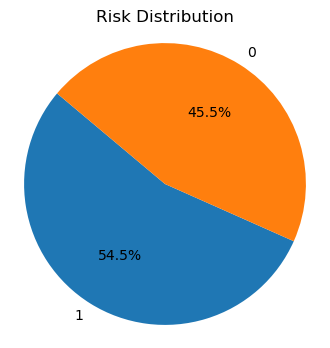

In [4]:
import matplotlib.pyplot as plt

# 데이터 프레임의 'risk' 열의 value_counts() 결과
risk_counts = df['target'].value_counts()

# 파이 차트를 생성합니다.
plt.figure(figsize=(4, 4))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Risk Distribution')
plt.axis('equal')  # 원을 원형으로 유지합니다.
plt.show()


#### 심장질환 환자가 54.5%로 더 많은 것을 알 수 있다.

#### 수치형 데이터에 한해서 이상치를 제거하기 위해 각각 의 데이터프레임으로 분리한다.

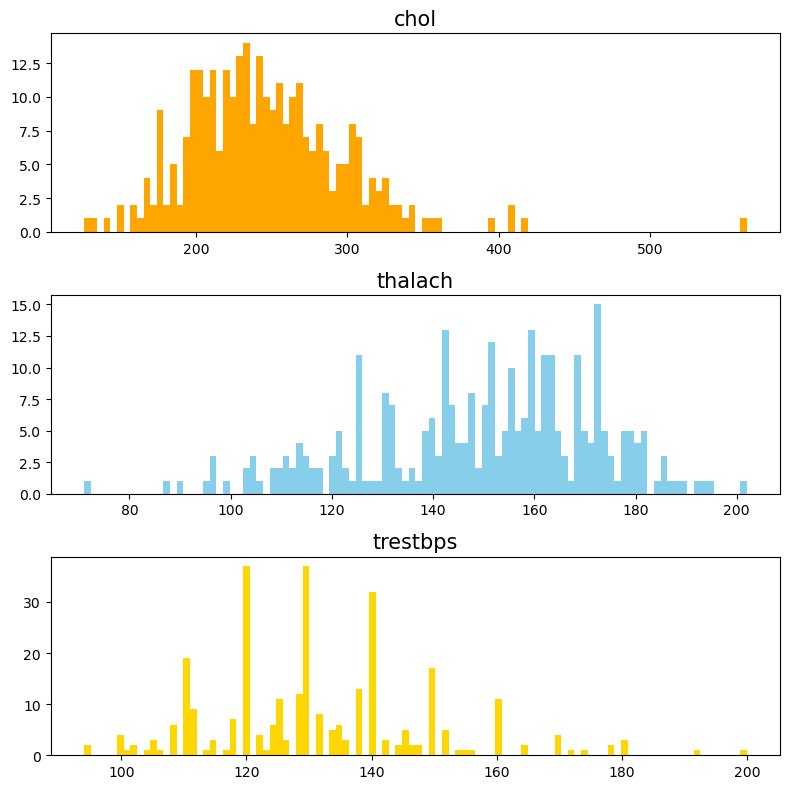

In [5]:
# 서브플롯 생성
fig, axes = plt.subplots(3, 1, figsize=(8, 8))  # 2행 1열의 서브플롯

# 이상치 제거 후 수치형 데이터 시각화 
axes[0].hist(df['chol'], bins=100, color="orange")
axes[0].set_title('chol', fontsize=15)

axes[1].hist(df['thalach'], bins=100, color="skyblue")
axes[1].set_title('thalach', fontsize=15)

axes[2].hist(df['trestbps'], bins=100, color="gold")
axes[2].set_title('trestbps', fontsize=15)
plt.tight_layout()
plt.show()

In [6]:
ts_df = df.loc[:,'trestbps'].reset_index()
ts_df

,index,trestbps
0,0,145
1,1,130
2,2,130
3,3,120
4,4,120
...,...,...
298,298,140
299,299,110
300,300,144
301,301,130


In [7]:
th_df = df.loc[:,'thalach'].reset_index()
th_df

,index,thalach
0,0,150
1,1,187
2,2,172
3,3,178
4,4,163
...,...,...
298,298,123
299,299,132
300,300,141
301,301,115


In [8]:
chol_df = df.loc[:,'chol'].reset_index()
chol_df

,index,chol
0,0,233
1,1,250
2,2,204
3,3,236
4,4,354
...,...,...
298,298,241
299,299,264
300,300,193
301,301,131


In [9]:
from sklearn.preprocessing import StandardScaler
# 데이터의 평균을 0, 분산을 1이 되도록 표준 정규분포를 따르게 하는 스케일링 
# ± 1.96을 벗어나면 이상치로 판단한다.
std = StandardScaler()
std_df = std.fit_transform(chol_df[['chol']])
std_df # 표준 정규 분포 결과 

std_th = std.fit_transform(th_df[['thalach']])
std_th

std_ts = std.fit_transform(ts_df[['trestbps']])
std_ts

array([[ 0.76395577],
       [-0.09273778],
       [-0.09273778],
       [-0.66386682],
       [-0.66386682],
       [ 0.47839125],
       [ 0.47839125],
       [-0.66386682],
       [ 2.30600417],
       [ 1.04952029],
       [ 0.47839125],
       [-0.09273778],
       [-0.09273778],
       [-1.23499586],
       [ 1.04952029],
       [-0.66386682],
       [-0.66386682],
       [ 1.04952029],
       [ 1.04952029],
       [ 0.47839125],
       [ 0.19282673],
       [-0.09273778],
       [ 0.47839125],
       [ 1.04952029],
       [ 0.47839125],
       [ 1.62064933],
       [ 1.04952029],
       [-1.23499586],
       [ 0.47839125],
       [-0.09273778],
       [-1.52056038],
       [-0.66386682],
       [-0.09273778],
       [-0.3783023 ],
       [-0.3783023 ],
       [ 0.59261706],
       [ 0.19282673],
       [ 1.04952029],
       [ 1.33508481],
       [ 1.62064933],
       [ 0.47839125],
       [-0.09273778],
       [-1.57767328],
       [-0.09273778],
       [ 0.47839125],
       [-0

In [10]:
chol_df['chol'] = std_df
display(chol_df)

th_df['thalach'] = std_th
display(th_df)

ts_df['trestbps'] = std_ts
display(ts_df)

,index,chol
0,0,-0.256334
1,1,0.072199
2,2,-0.816773
3,3,-0.198357
4,4,2.082050
...,...,...
298,298,-0.101730
299,299,0.342756
300,300,-1.029353
301,301,-2.227533


,index,thalach
0,0,0.015443
1,1,1.633471
2,2,0.977514
3,3,1.239897
4,4,0.583939
...,...,...
298,298,-1.165281
299,299,-0.771706
300,300,-0.378132
301,301,-1.515125


,index,trestbps
0,0,0.763956
1,1,-0.092738
2,2,-0.092738
3,3,-0.663867
4,4,-0.663867
...,...,...
298,298,0.478391
299,299,-1.234996
300,300,0.706843
301,301,-0.092738


In [11]:
# SkinThickness에 대한 이상치 제거
a1 = chol_df['chol'] >= -1.96
a2 = chol_df['chol'] <= 1.96
a = a1 & a2

# # 첫 번째 조건을 만족하는 pima_df 업데이트
df = df.loc[df[a].index].reset_index(drop=True)

# BloodPressure에 대한 이상치 제거 (새 조건 적용)
b1 = th_df['thalach'] >= -1.96  # BP_df 대신 업데이트된 pima_df 사용
b2 = th_df['thalach'] <= 1.96
b = b1 & b2

# 두 번째 조건을 만족하는 pima_df 업데이트
df = df.loc[df[b].index].reset_index(drop=True)
df

c1 = ts_df['trestbps'] >= -1.96
c2 = ts_df['trestbps'] <= 1.96
c = c1 & c2

df = df.loc[df[c].index].reset_index(drop=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_14992\2763755252.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[df[b].index].reset_index(drop=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14992\2763755252.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[df[c].index].reset_index(drop=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
263,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
264,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
265,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


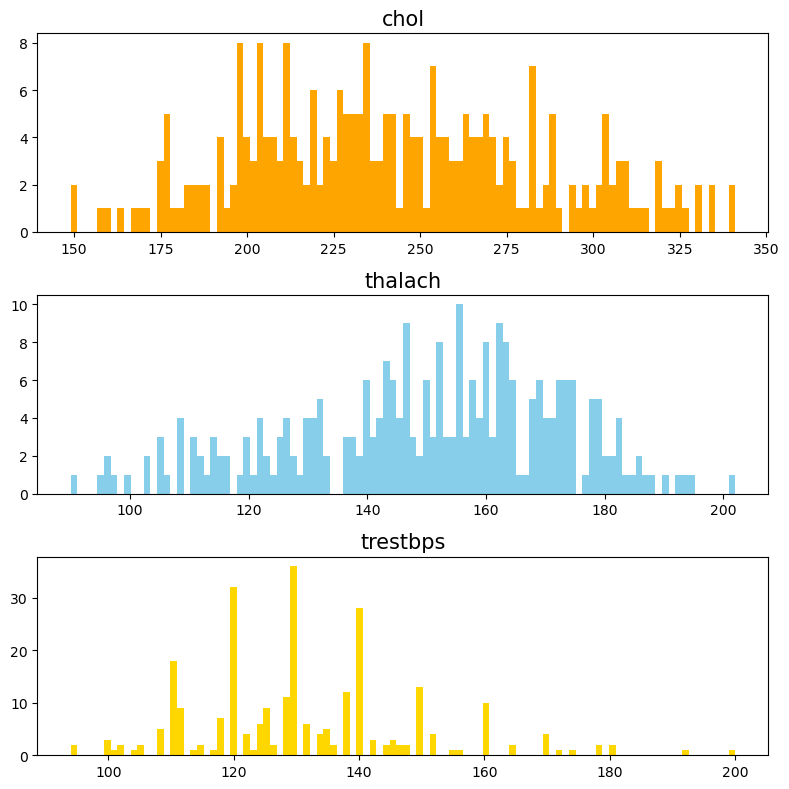

In [12]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(3, 1, figsize=(8, 8))  # 2행 1열의 서브플롯

# 이상치 제거 후 수치형 데이터 시각화 
axes[0].hist(df['chol'], bins=100, color="orange")
axes[0].set_title('chol', fontsize=15)

axes[1].hist(df['thalach'], bins=100, color="skyblue")
axes[1].set_title('thalach', fontsize=15)

axes[2].hist(df['trestbps'], bins=100, color="gold")
axes[2].set_title('trestbps', fontsize=15)
plt.tight_layout()
plt.show()


In [13]:
df.isna().sum() # 결측치는 존재 안함 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:

df.duplicated().sum() # 중복된 행 존재 

1

In [15]:
df = df.drop_duplicates() # 중복치 제거 

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe().T # 통계량 분석 

,count,mean,std,min,25%,50%,75%,max
age,266.0,54.086466,9.165771,29.0,47.0,54.0,60.75,77.0
sex,266.0,0.695489,0.461068,0.0,0.0,1.0,1.00,1.0
cp,266.0,1.000000,1.042493,0.0,0.0,1.0,2.00,3.0
trestbps,266.0,131.439850,17.615981,94.0,120.0,130.0,140.00,200.0
chol,266.0,242.676692,42.100876,149.0,211.0,239.5,270.75,341.0
fbs,266.0,0.150376,0.358113,0.0,0.0,0.0,0.00,1.0
restecg,266.0,0.515038,0.522836,0.0,0.0,1.0,1.00,2.0
thalach,266.0,149.796992,22.668159,90.0,136.0,152.0,166.75,202.0
exang,266.0,0.312030,0.464195,0.0,0.0,0.0,1.00,1.0
oldpeak,266.0,0.991729,1.168036,0.0,0.0,0.6,1.60,6.2


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(max_depth=4)

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets,test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train) 

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [7,8,9],
    'min_samples_split' : [23,24,25]
         }
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)


print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params',   'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV 최고 평균 정확도 수치: 0.7501
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 7, 'min_samples_split': 23}


,rank_test_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,1,"{'max_depth': 7, 'min_samples_split': 23}",0.697674,0.790698,0.761905,0.714286,0.785714
1,4,"{'max_depth': 7, 'min_samples_split': 24}",0.697674,0.790698,0.738095,0.714286,0.785714
2,7,"{'max_depth': 7, 'min_samples_split': 25}",0.697674,0.790698,0.714286,0.714286,0.785714
3,4,"{'max_depth': 8, 'min_samples_split': 23}",0.697674,0.790698,0.738095,0.714286,0.785714
4,1,"{'max_depth': 8, 'min_samples_split': 24}",0.697674,0.790698,0.761905,0.714286,0.785714
5,7,"{'max_depth': 8, 'min_samples_split': 25}",0.697674,0.790698,0.714286,0.714286,0.785714
6,4,"{'max_depth': 9, 'min_samples_split': 23}",0.697674,0.790698,0.738095,0.714286,0.785714
7,1,"{'max_depth': 9, 'min_samples_split': 24}",0.697674,0.790698,0.761905,0.714286,0.785714
8,7,"{'max_depth': 9, 'min_samples_split': 25}",0.697674,0.790698,0.714286,0.714286,0.785714


In [19]:
from sklearn.tree import export_graphviz

class_names_str = list(map(str, targets))

export_graphviz(dtc, out_file='./images/disease_dtc01.dot', class_names=class_names_str, feature_names=features.columns, 
                impurity=True, filled=True)

In [20]:
import graphviz

with open('./images/disease_dtc01.dot') as f:
    disease_dtc01 = f.read()

disease_dtc01_graph = graphviz.Source(disease_dtc01)


In [21]:
disease_dtc01_graph.render(filename="disease_dtc01", directory="./images", format="png")

'images\\disease_dtc01.png'

<img src='./images/disease_dtc01.png'>

In [22]:
dtc.feature_importances_

array([0.        , 0.03459242, 0.33239372, 0.04291421, 0.06296622,
       0.        , 0.        , 0.05074756, 0.02702683, 0.0725407 ,
       0.        , 0.16878538, 0.20803297])

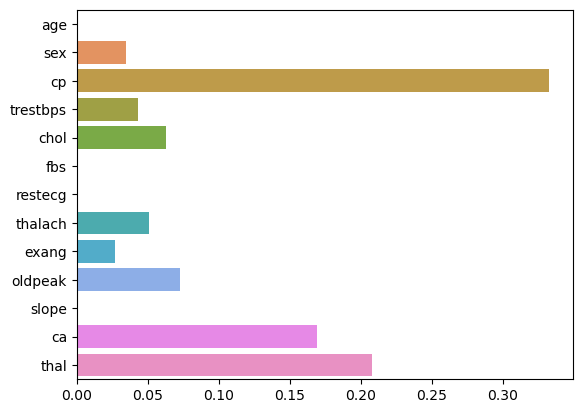

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

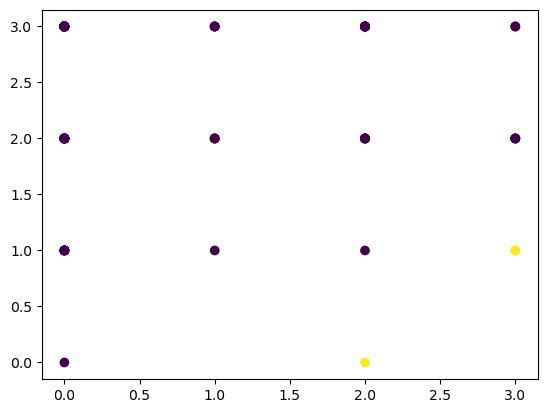

In [24]:
plt.scatter(features.iloc[:,2], features.iloc[:,-1], c=targets)

In [25]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

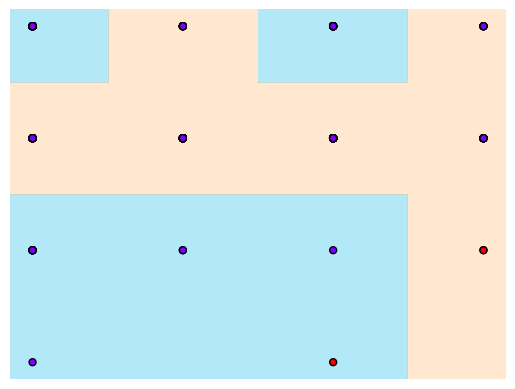

In [26]:
features_2_4 = features.iloc[:,[2,12]]
visualize_boundary(dtc, features_2_4, targets)

#### GridSearch CV 교차검증 수행 

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [7,8,9],
    'min_samples_split' : [23,24,25]
         }
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)


print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params',   'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV 최고 평균 정확도 수치: 0.7501
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 7, 'min_samples_split': 23}


,rank_test_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,1,"{'max_depth': 7, 'min_samples_split': 23}",0.697674,0.790698,0.761905,0.714286,0.785714
1,5,"{'max_depth': 7, 'min_samples_split': 24}",0.697674,0.790698,0.738095,0.714286,0.785714
2,7,"{'max_depth': 7, 'min_samples_split': 25}",0.697674,0.790698,0.714286,0.714286,0.785714
3,1,"{'max_depth': 8, 'min_samples_split': 23}",0.697674,0.790698,0.761905,0.714286,0.785714
4,5,"{'max_depth': 8, 'min_samples_split': 24}",0.697674,0.790698,0.738095,0.714286,0.785714
5,7,"{'max_depth': 8, 'min_samples_split': 25}",0.697674,0.790698,0.714286,0.714286,0.785714
6,1,"{'max_depth': 9, 'min_samples_split': 23}",0.697674,0.790698,0.761905,0.714286,0.785714
7,1,"{'max_depth': 9, 'min_samples_split': 24}",0.697674,0.790698,0.761905,0.714286,0.785714
8,7,"{'max_depth': 9, 'min_samples_split': 25}",0.697674,0.790698,0.714286,0.714286,0.785714


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

accuracy_score의 경우 74 %가 나옴

In [29]:
from sklearn.metrics import accuracy_score

dtc = grid_cv.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 87.037%


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[20  3]
 [ 4 27]]
정확도: 0.8704, 정밀도: 0.9000, 재현율: 0.8710, F1: 0.8852, ROC-AUC: 0.8703
################################################################################


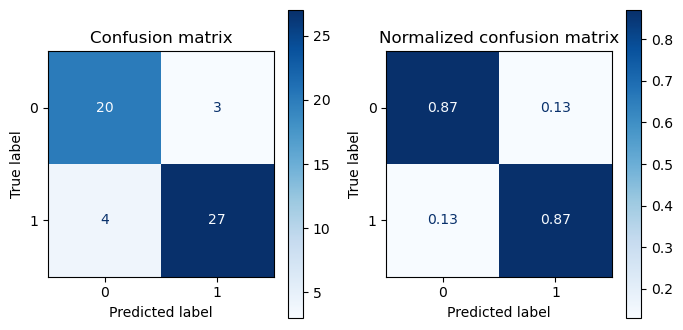

In [31]:
get_evaluation(y_test, prediction, dtc, X_test)

#### 오차행렬과 정확도 및 F1 스코어 조사 결과 
- 현재 f1 score가 0.75로 정밀도가 더 높은 상황 threshold(임계치)를 더 낮춰서 재현율을 올려야하는 상황

In [32]:
# 
#이 코드는 결정 트리 모델을 사용하여 테스트 세트에 대한 예측을 수행하고, 각 예측의 확률을 출력.

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.6, 0.4] 0
[0.01694915254237288, 0.9830508474576272] 1
[0.01694915254237288, 0.9830508474576272] 1
[0.01694915254237288, 0.9830508474576272] 1
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.8333333333333334, 0.16666666666666666] 0
[0.875, 0.125] 0
[1.0, 0.0] 0
[0.14285714285714285, 0.8571428571428571] 1
[0.7727272727272727, 0.22727272727272727] 0
[0.7727272727272727, 0.22727272727272727] 0
[0.01694915254237288, 0.9830508474576272] 1
[0.01694915254237288, 0.9830508474576272] 1
[0.875, 0.125] 0
[0.01694915254237288, 0.9830508474576272] 1
[0.05263157894736842, 0.9473684210526315] 1
[0.05263157894736842, 0.9473684210526315] 1
[0.25, 0.75] 1
[0.01694915254237288, 0.9830508474576272] 1
[0.01694915254237288, 0.9830508474576272] 1
[1.0, 0.0] 0
[0.6, 0.4] 0
[0.05263157894736842, 0.9473684210526315] 1
[0.4444444444444444, 0.5555555555555556] 1
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.01694915254237288, 0.9830508474576272] 1
[0.01694915254237288, 0.9830508474576272] 1
[0.25, 0.75] 1
[0.01694915254237288, 0.9830508474576272]

In [34]:
from sklearn.preprocessing import Binarizer

threshold = 0.24 # 임계치를 0.24로 낮춤 


proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [35]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.7]

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.24
오차 행렬
[[17  6]
 [ 2 29]]
정확도: 0.8519, 정밀도: 0.8286, 재현율: 0.9355, F1: 0.8788, ROC-AUC: 0.8373
################################################################################
0.3
오차 행렬
[[17  6]
 [ 2 29]]
정확도: 0.8519, 정밀도: 0.8286, 재현율: 0.9355, F1: 0.8788, ROC-AUC: 0.8373
################################################################################
0.4
오차 행렬
[[20  3]
 [ 4 27]]
정확도: 0.8704, 정밀도: 0.9000, 재현율: 0.8710, F1: 0.8852, ROC-AUC: 0.8703
################################################################################
0.5
오차 행렬
[[20  3]
 [ 4 27]]
정확도: 0.8704, 정밀도: 0.9000, 재현율: 0.8710, F1: 0.8852, ROC-AUC: 0.8703
################################################################################
0.51
오차 행렬
[[20  3]
 [ 4 27]]
정확도: 0.8704, 정밀도: 0.9000, 재현율: 0.8710, F1: 0.8852, ROC-AUC: 0.8703
################################################################################
0.52
오차 행렬
[[20  3]
 [ 4 27]]
정확도: 0.8704, 정밀도: 0.9000, 재현율: 0.8710, F1: 0.8852, ROC-AUC: 0.8703
################

In [36]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[17  6]
 [ 2 29]]
정확도: 0.8519, 정밀도: 0.8286, 재현율: 0.9355, F1: 0.8788, ROC-AUC: 0.8373
################################################################################


In [ ]:
# 재현율 올라간것을 확인 할 수 있다. 정밀도는 낮아짐 

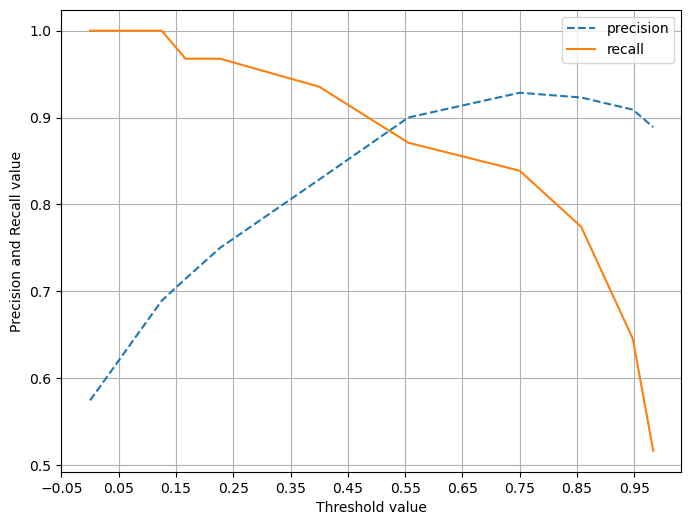

In [37]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [ ]:
# Threshold를 활용한 cuv 시각화 

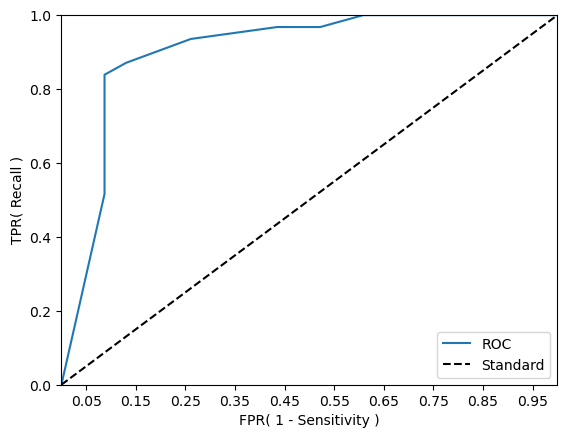

In [38]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [39]:
from sklearn.preprocessing import Binarizer

threshold = 0.25

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)


custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[17  6]
 [ 2 29]]
정확도: 0.8519, 정밀도: 0.8286, 재현율: 0.9355, F1: 0.8788, ROC-AUC: 0.8373
################################################################################


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


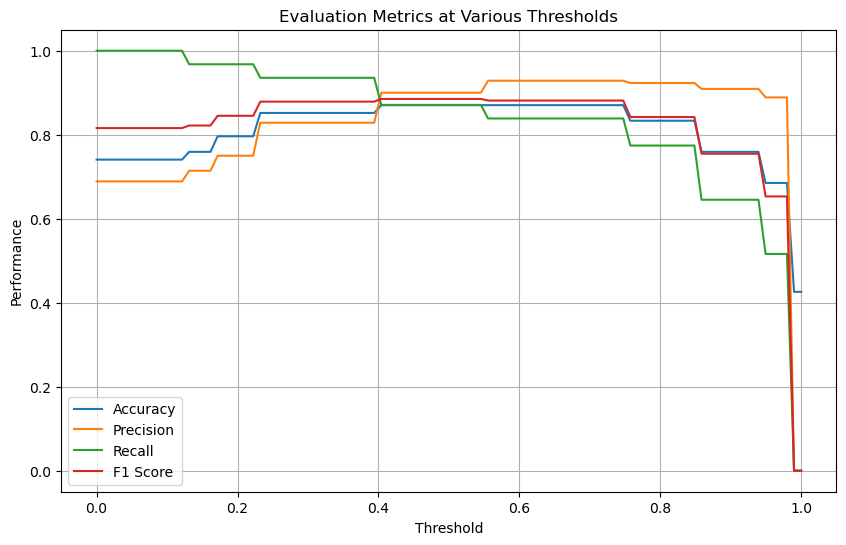

In [41]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y_test, custom_prediction))

evaluations = np.array(evaluations)

# 각 성능 지표를 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
# 임계치에 따른 정확도, 정밀도, 재현율, f1 스코어 시각화 